In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

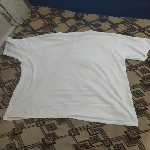

In [13]:
path = './clothing-dataset-small/train/t-shirt'
name = '0a85a584-cb49-4795-b2f1-7eebbf09399a.jpg'
fullname = f'{path}/{name}'
load_img(fullname, target_size=(150, 150))

In [14]:
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions

In [15]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
    )
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [16]:
base_model = Xception(
    weights='imagenet',
    input_shape=(150, 150, 3),
    include_top=False
)

base_model.trainable = False
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False) #out put from base model
vector = keras.layers.GlobalAveragePooling2D()(base) #convert to vector taking the average of all the features
inner = keras.layers.Dense(1024, activation='relu')(vector) #fully connected layer-Dense layer
dropout = keras.layers.Dropout(0.2)(inner) #dropout layer to avoid overfitting
outputs = keras.layers.Dense(10, activation='softmax')(dropout) #output layer for 10 classes
model = keras.Model(inputs, outputs)

In [17]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10


96/96 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.5877 - loss: 1.2847 - val_accuracy: 0.7537 - val_loss: 0.7396
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.6871 - loss: 0.8915 - val_accuracy: 0.7537 - val_loss: 0.6754
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.7350 - loss: 0.7601 - val_accuracy: 0.7889 - val_loss: 0.5875
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.7542 - loss: 0.6993 - val_accuracy: 0.8006 - val_loss: 0.6258
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.7624 - loss: 0.6793 - val_accuracy: 0.8006 - val_loss: 0.5959
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.7790 - loss: 0.6347 - val_accuracy: 0.8211 - val_loss: 0.5615
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.7966 - loss: 0.5811 - val_accuracy: 0.8065 - val_loss: 0.5759
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.8031 - loss: 0.5657 - val_accuracy: 0.7918 - val_loss: 0.

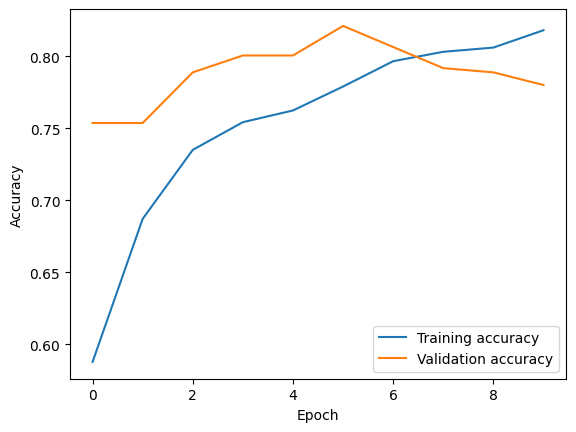

In [19]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
checkpoint_path = "clothes_classification_model.h5"
model.save(checkpoint_path)

# RUNING the model on the test set

In [21]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test accuracy: {test_accuracy:.4f}')

Found 372 images belonging to 10 classes.
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7688 - loss: 0.6068
Test accuracy: 0.7688


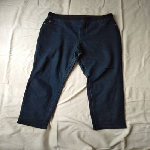

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
pants


In [ ]:
import numpy as np
 
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

img = load_img(path, target_size=(150, 150))
img.show()
x = np.array(img)
X = np.array([x])
 
X = preprocess_input(X)
pred = model.predict(X)
labels = ['dress', 'hat', 'longsleeve', 'outwear', 'pants', 'shirt', 'shoes', 'shorts', 'skirt', 't-shirt']
pred = labels[np.argmax(pred)]
print(pred)